In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
apartment_df = pd.read_excel('/content/drive/MyDrive/Octave - John Keells Codes/Q1 Apartment Rentals Dataset.xlsx')

In [ ]:
apartment_df.head(2)

,Apartment_ID,Rental_Price_USD,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center_KM,Neighborhood,Furnished,Building_Type
0,1,2248,748,2,1,2.07,Uptown,Yes,Apartment
1,5,1883,696,1,1,7.41,Uptown,No,Apartment


In [ ]:
apartment_df.describe()

,Apartment_ID,Rental_Price_USD,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center_KM
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,121.523810,2039.690476,976.702381,1.821429,1.571429,6.044405
std,72.802005,464.611769,188.574601,0.823754,0.497844,3.623142
min,1.000000,987.000000,540.000000,1.000000,1.000000,0.570000
25%,57.000000,1739.500000,845.000000,1.000000,1.000000,2.887500
50%,126.500000,2052.000000,994.500000,2.000000,2.000000,6.265000
75%,179.750000,2273.250000,1104.500000,3.000000,2.000000,9.322500
max,249.000000,3926.000000,1431.000000,3.000000,2.000000,11.860000


In [ ]:
apartment_df.dtypes

,0
Apartment_ID,int64
Rental_Price_USD,int64
Size_in_Sqft,int64
Bedrooms,int64
Bathrooms,int64
Distance_to_City_Center_KM,float64
Neighborhood,object
Furnished,object
Building_Type,object


In [ ]:
categorical_columns = apartment_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
  print(f"Summary Statistics for '{col}'")
  print(apartment_df[col].value_counts(normalize=True)*100)
  print('-'*40)

Summary Statistics for 'Neighborhood'
Neighborhood
Uptown      35.714286
Suburbs     22.619048
Downtown    22.619048
Midtown     19.047619
Name: proportion, dtype: float64
----------------------------------------
Summary Statistics for 'Furnished'
Furnished
Yes    51.190476
No     48.809524
Name: proportion, dtype: float64
----------------------------------------
Summary Statistics for 'Building_Type'
Building_Type
Apartment    100.0
Name: proportion, dtype: float64
----------------------------------------


In [ ]:
apartment_df['Rental_Price_Rs'] = apartment_df['Rental_Price_USD'] * 304

mean = np.mean(apartment_df['Rental_Price_Rs'])
std = np.std(apartment_df['Rental_Price_Rs'])
price_limit = 500000

probability = stats.norm.cdf(price_limit, loc=mean, scale=std)

print(f"The probability of finding any apartment below Rs.500000 is '{probability}' ")

The probability of finding any apartment below Rs.500000 is '0.19622631512086836' 


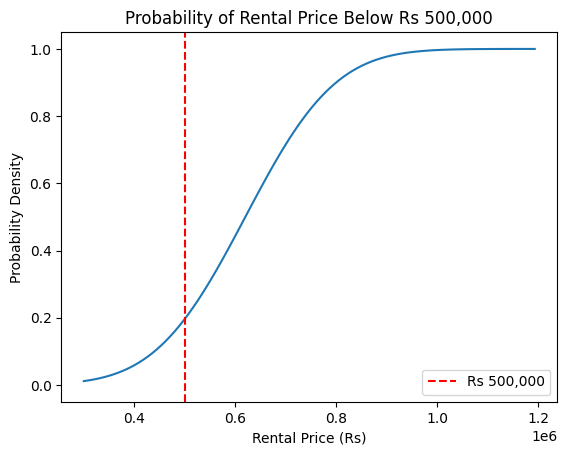

In [ ]:
x_axis = np.linspace(apartment_df['Rental_Price_Rs'].min(), apartment_df['Rental_Price_Rs'].max(), 100)
plt.plot(x_axis, stats.norm.cdf(x_axis, loc=mean, scale=std))
plt.fill_between(x_axis, stats.norm.pdf(x_axis, loc=mean, scale=std),
                 where=(x_axis < price_limit), alpha=0.3)
plt.axvline(x=price_limit, color='red', linestyle='--', label=f'Rs 500,000')
plt.xlabel("Rental Price (Rs)")
plt.ylabel("Probability Density")
plt.title("Probability of Rental Price Below Rs 500,000")
plt.legend()
plt.show()

<ipython-input-36-cea76e05dbcd>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=apartment_df, x='Neighborhood', y='Rental_Price_USD', hue='Building_Type', ci=None)


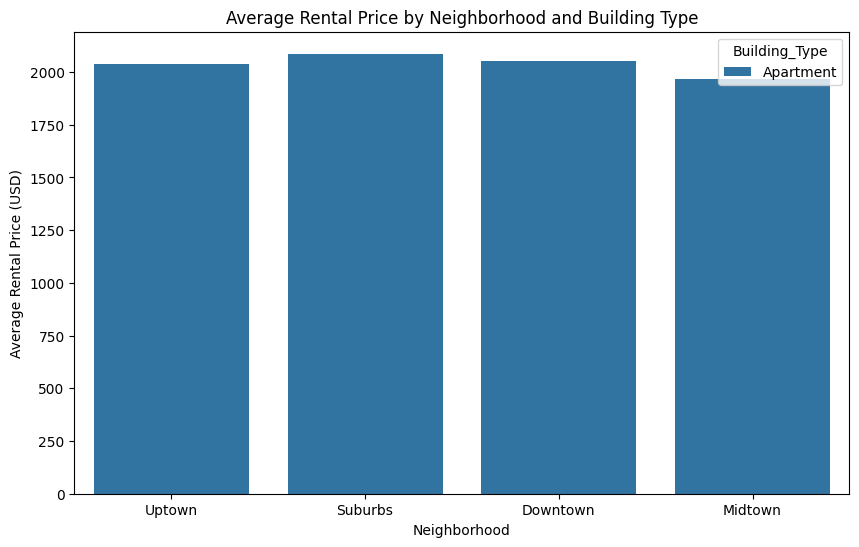

In [ ]:
avg_rental_per_neigh_building = apartment_df.groupby(['Neighborhood','Building_Type'])['Rental_Price_USD'].mean()
avg_rental_per_neigh_building

plt.figure(figsize=(10,6))
sns.barplot(data=apartment_df, x='Neighborhood', y='Rental_Price_USD', hue='Building_Type', ci=None)
plt.xlabel('Neighborhood')
plt.ylabel('Average Rental Price (USD)')
plt.title('Average Rental Price by Neighborhood and Building Type')
plt.show()

Text(0, 0.5, 'Frequency')

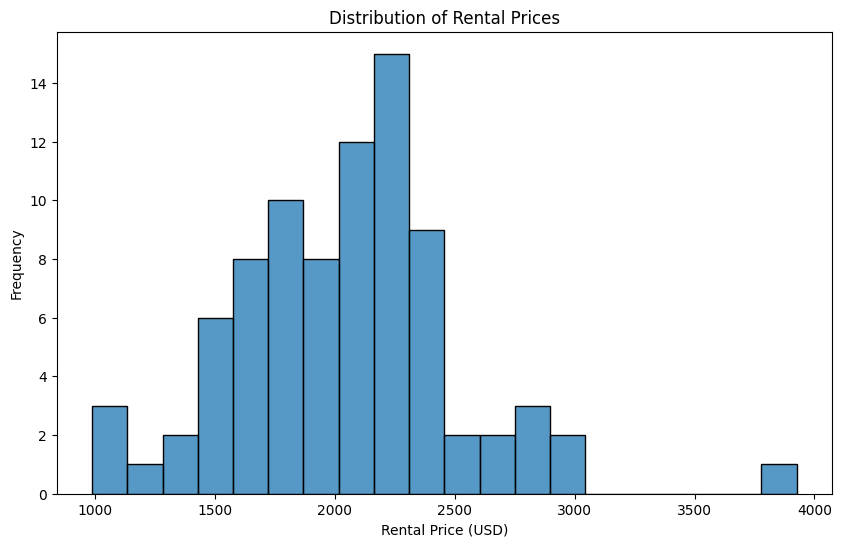

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(apartment_df['Rental_Price_USD'], bins=20)
plt.title('Distribution of Rental Prices')
plt.xlabel('Rental Price (USD)')
plt.ylabel('Frequency')

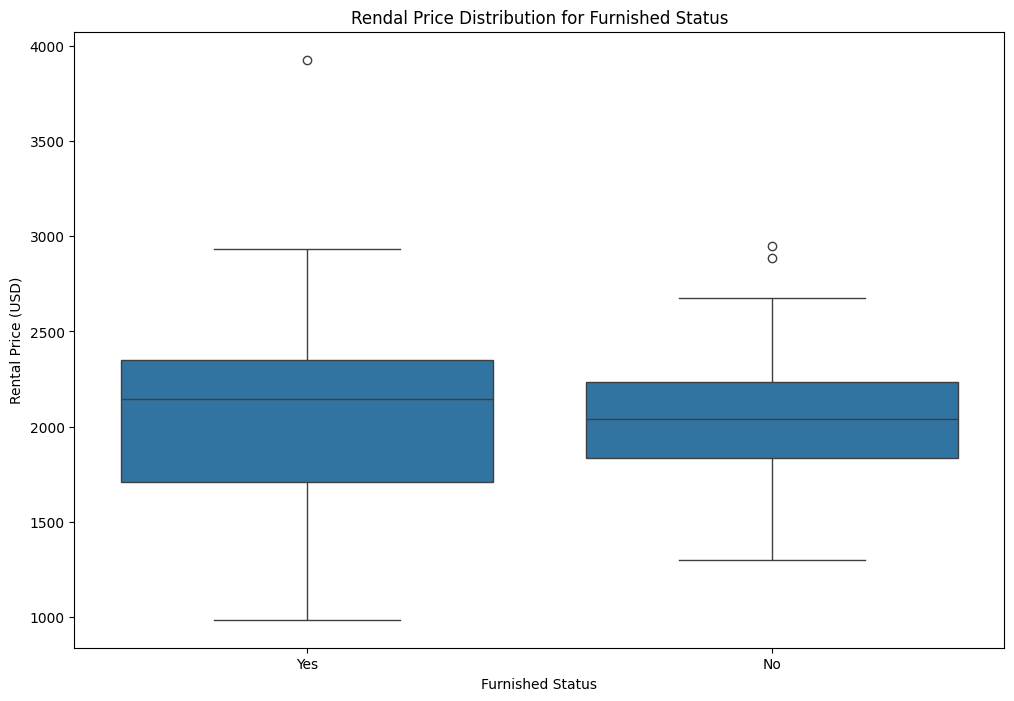

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=apartment_df, x='Furnished', y='Rental_Price_USD')
# sns.boxplot(apartment_df['Rental_Price_USD'])
plt.title('Rendal Price Distribution for Furnished Status')
plt.xlabel('Furnished Status')
plt.ylabel('Rental Price (USD)')
plt.show()

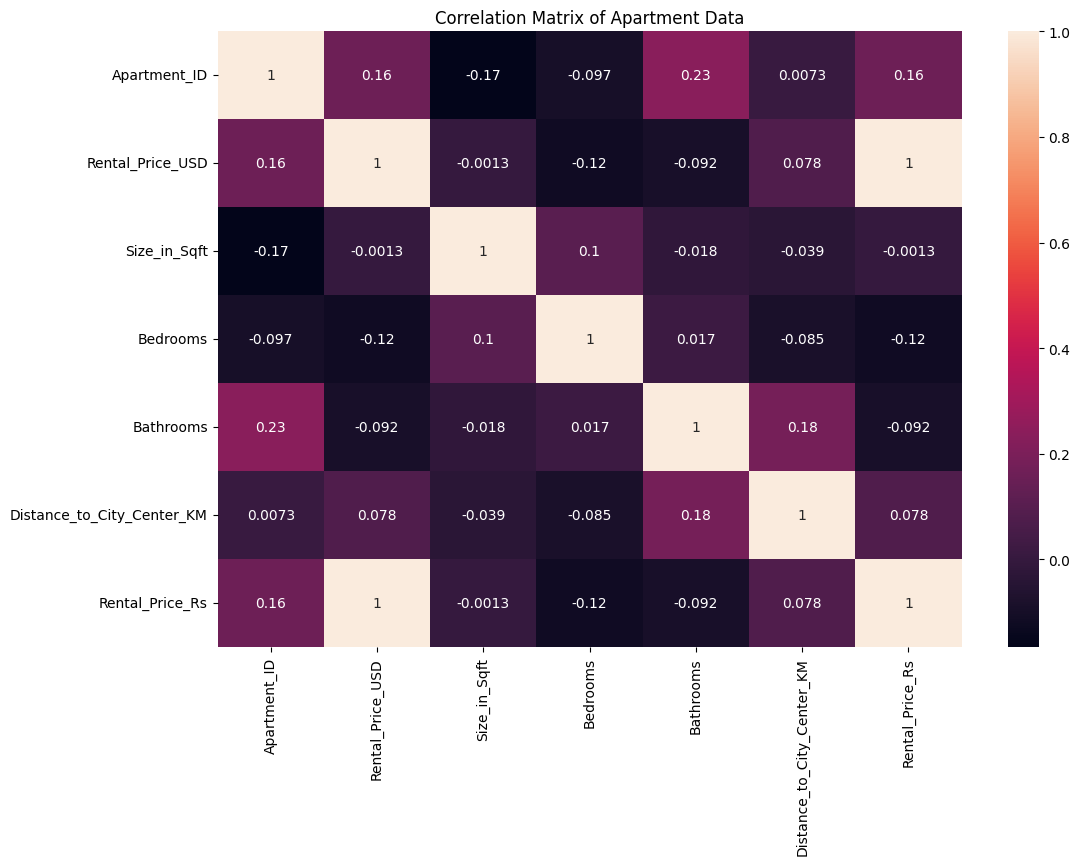

In [ ]:
numeric_columns = apartment_df.select_dtypes(include=['int64', 'float']).columns
numeric_df = apartment_df[numeric_columns]

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix of Apartment Data')
plt.show()

In [ ]:
avg_rental_per_neighbourhood = apartment_df.groupby(['Neighborhood'])['Rental_Price_USD'].mean()
avg_rental_per_neighbourhood

,Rental_Price_USD
Neighborhood,
Downtown,2051.736842
Midtown,1968.312500
Suburbs,2086.842105
Uptown,2040.266667


<Axes: xlabel='Neighborhood'>

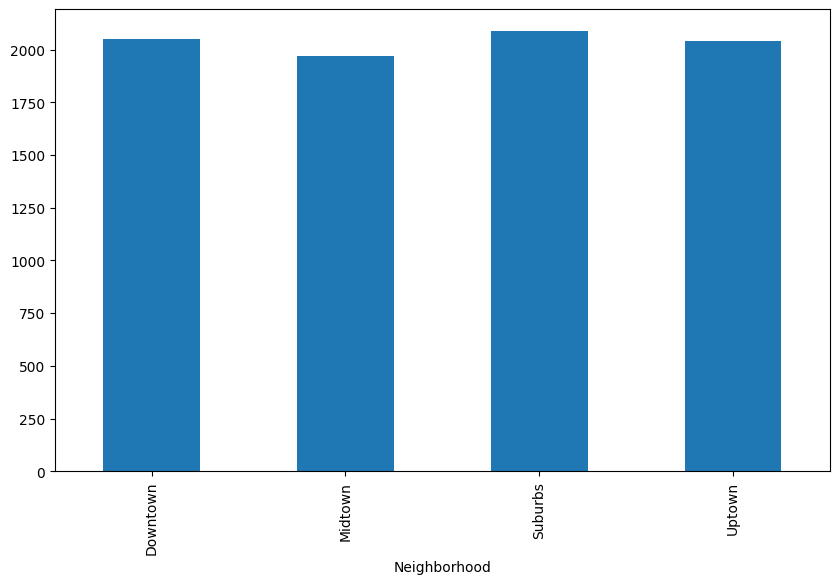

In [ ]:
plt.figure(figsize=(10,6))
avg_rental_per_neighbourhood.plot(kind='bar')

In [ ]:
correlation = apartment_df['Size_in_Sqft'].corr(apartment_df['Rental_Price_USD'])
print(f"The correlation between 'Size_in_Sqft' and 'Rental_Price_USD' is '{correlation}'")

The correlation between 'Size_in_Sqft' and 'Rental_Price_USD' is '-0.0012622096057841221'


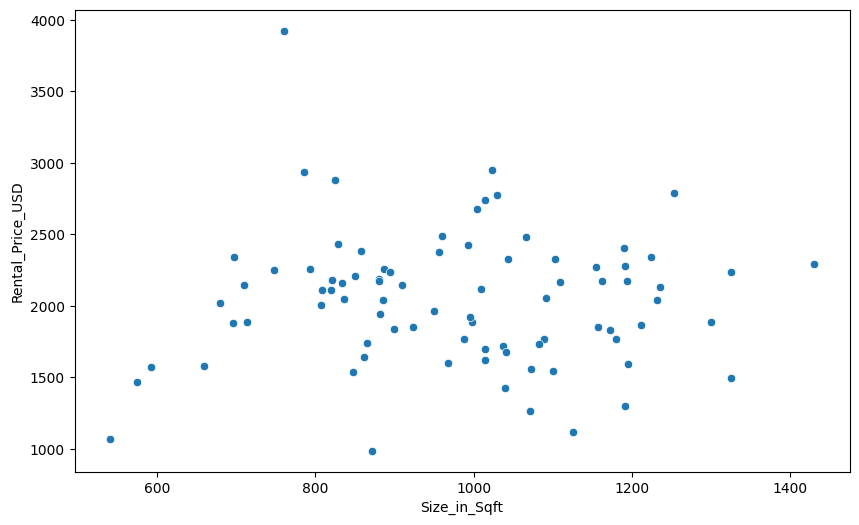

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=apartment_df, x='Size_in_Sqft', y='Rental_Price_USD')
plt.show()

In [ ]:
mean_rental_furnished_status = apartment_df.groupby('Furnished')['Rental_Price_USD'].mean()
mean_rental_furnished_status

,Rental_Price_USD
Furnished,
No,2025.048780
Yes,2053.651163


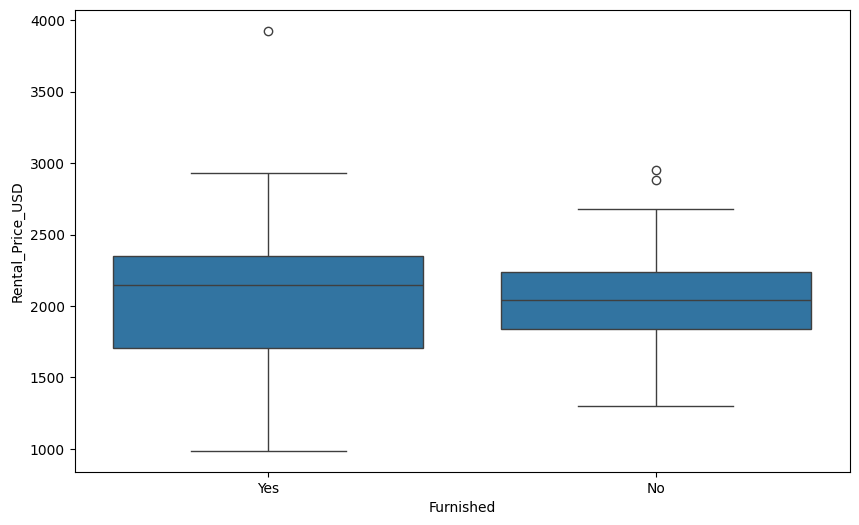

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=apartment_df, x='Furnished', y='Rental_Price_USD')
plt.show()

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.

The interpretability of linear regression is one of its greatest strengths. The model’s equation offers clear coefficients that illustrate the influence of each independent variable on the dependent variable.

Primary objective while using linear regression is to **locate the best-fit line**, which implies that the error between the predicted and actual values should be kept to a minimum. There will be the least error in the best-fit line.

**Assumptions:**

Linearity: There is a linear relationship between the independent and dependent variables.

Independence: The observations should be independent from each other that is the errors from one observation should not influence other.

**Mean Squared Error:** calculates the average of the squared differences between the actual and predicted values for all the data points.

**Coefficient of Determination (R-squared):**
R-Squared is a statistic that indicates how much variation the developed model can explain or capture.
It is always in the range of 0 to 1.
In general, the better the model matches the data, the greater the R-squared number.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

def liner_regression_process(apartment_df):
  X = apartment_df.drop('Rental_Price_USD', axis=1)
  y = apartment_df['Rental_Price_USD']

  numerical_col = X.select_dtypes(include=['number']).columns
  categorical_col = X.select_dtypes(include=['object']).columns

  # categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
  # numerical_transformer = Pipeline(steps=[('scale', StandardScaler())])

  preprocessor = ColumnTransformer(transformers=[('numeric', StandardScaler(), numerical_col), ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_col)])

  model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

  model.fit(X, y)

  return model

results = liner_regression_process(apartment_df)
results

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Apartment_ID', 'Size_in_Sqft', 'Bedrooms', 'Bathrooms',
       'Distance_to_City_Center_KM', 'Rental_Price_Rs'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Neighborhood', 'Furnished', 'Building_Type'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
# Get the trained Linear Regression model
linear_model = results.named_steps['regressor']

# Intercept (b0 in the equation y = b0 + b1*x1 + b2*x2 + ...)
print("Intercept:", linear_model.intercept_)

# Coefficients (b1, b2, ..., corresponding to features)
print("Coefficients:", linear_model.coef_)

coefficients = linear_model.coef_
features = results.named_steps['preprocessor'].get_feature_names_out()

for feature, coef in zip(features, coefficients):
  print(f"{feature}, {coef}")

Intercept: 2039.6904761904761
Coefficients: [ 3.72127528e-14  0.00000000e+00  8.52651283e-14  3.55271368e-13
 -1.39888101e-13  4.61837943e+02  1.36779477e-13  3.55271368e-14
 -4.97379915e-14 -1.46105350e-13  8.52651283e-14 -1.27897692e-13
  0.00000000e+00]
numeric__Apartment_ID, 3.721275281281903e-14
numeric__Size_in_Sqft, 0.0
numeric__Bedrooms, 8.526512829121202e-14
numeric__Bathrooms, 3.552713678800501e-13
numeric__Distance_to_City_Center_KM, -1.3988810110276972e-13
numeric__Rental_Price_Rs, 461.83794251597806
categorical__Neighborhood_Downtown, 1.3677947663381929e-13
categorical__Neighborhood_Midtown, 3.552713678800501e-14
categorical__Neighborhood_Suburbs, -4.973799150320701e-14
categorical__Neighborhood_Uptown, -1.461053500406706e-13
categorical__Furnished_No, 8.526512829121202e-14
categorical__Furnished_Yes, -1.2789769243681803e-13
categorical__Building_Type_Apartment, 0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Split features and target
X = apartment_df.drop('Rental_Price_USD', axis=1)
y = apartment_df['Rental_Price_USD']

# Identify numerical and categorical columns
numerical_col = X.select_dtypes(include=['number']).columns
categorical_col = X.select_dtypes(include=['object']).columns

# 1. OneHot Encode the categorical columns
one_hot_encode = OneHotEncoder(handle_unknown='ignore')

# Fit and transform categorical data
encoded_categorical = one_hot_encode.fit_transform(X[categorical_col]).toarray()

# Create DataFrame with new categorical feature names
encoded_df = pd.DataFrame(encoded_categorical, columns=one_hot_encode.get_feature_names_out(categorical_col))

# 2. Scale the numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_col])

# Create DataFrame with scaled numerical features
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_col)

# 3. Combine the encoded categorical and scaled numerical data
X_final = pd.concat([scaled_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_final.head()

,Apartment_ID,Size_in_Sqft,Bedrooms,Bathrooms,Distance_to_City_Center_KM,Rental_Price_Rs,Neighborhood_Downtown,Neighborhood_Midtown,Neighborhood_Suburbs,Neighborhood_Uptown,Furnished_No,Furnished_Yes,Building_Type_Apartment
0,-1.665444,-1.220079,0.218079,-1.154701,-1.103538,0.451045,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,-1.610171,-1.497488,-1.003166,-1.154701,0.379173,-0.339276,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,-1.582534,1.473990,-1.003166,-1.154701,-0.978591,1.624616,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-1.568716,-0.633252,-1.003166,0.866025,1.381530,0.745520,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,-1.554897,0.599084,-1.003166,-1.154701,-0.201139,-0.594777,1.0,0.0,0.0,0.0,1.0,0.0,1.0
